In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.datasets import make_regression, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

In [2]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [4]:
linear = LinearRegression()
linear.fit(X_train,y_train)
y_pred = linear.predict(X_test)
r2_score(y_test,y_pred)

0.7102093853530986

In [5]:
X_pred = linear.predict(X_train)

In [7]:
r2_score(y_train,X_pred)

0.6992718482984293

In [8]:
error_rate_train = mean_absolute_error(y_train,X_pred)
error_rate_test = mean_absolute_error(y_test,y_pred)

In [11]:
print(error_rate_train)
print(error_rate_test)

13.480291571215735
16.155627345311927


In [12]:
variance = np.abs(error_rate_train - error_rate_test)

In [13]:
variance

2.675335774096192

In [14]:
linear.intercept_

-1.6056382989501508

In [15]:
linear.coef_

array([26.92145767])

### Applying the ridge regression to regularize the model 

In [78]:
r = Ridge(alpha=13)

In [79]:
r.fit(X_train,y_train)

Ridge(alpha=13)

In [80]:
y_pred_ridge = r.predict(X_test)

In [81]:
r.coef_

array([23.95835777])

In [82]:
r2_score(y_test,y_pred_ridge)

0.6435834726155709

In [55]:
X_train.shape

(80, 1)

In [56]:
y_train.shape

(80,)

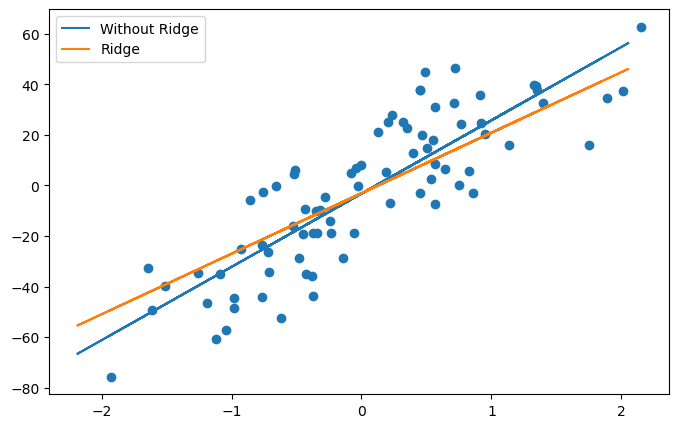

In [84]:
fig = plt.figure(figsize=(8,5))
ax1 = plt.subplot(1,1,1)
ax1.scatter(X_train,y_train)
ax1.plot(X_test,y_pred, label = 'Without Ridge')
ax1.plot(X_test, y_pred_ridge, label='Ridge')
ax1.legend()

### Applying the Ridge Regression with own algorithm

In [104]:
class CustomAlgorithm:
    def __init__(self, alpha):
        self.coefficient = None
        self.intercept = None
        self.alpha = alpha
        
    def fit(self,X_train,y_train):
        X_mean = np.mean(X_train)
        y_mean = np.mean(y_train)
        
        numerator = 0
        denominator = 0
        
        for i in range(0,len(X_train)):
            numerator = numerator + ((X_train[i][0] - X_mean) * (y_train[i] - y_mean))

            if i == len(X_train)-1:
                denominator = denominator + (self.alpha + ((X_train[i][0] - X_mean)**2))
                break
                
            denominator = denominator + ((X_train[i][0] - X_mean)**2)
        
        self.coefficient = numerator / denominator
        self.intercept = y_mean - self.coefficient * X_mean
        
        print(f'coefficient: {self.coefficient}, intercept:{self.intercept}')
        
    def predict(self, X_test):
        return self.coefficient * X_test + self.intercept

In [125]:
rr = CustomAlgorithm(alpha=5)

In [126]:
rr.fit(X_train,y_train)

coefficient: 26.839949927478173, intercept:-3.1473544333852237


In [127]:
y_pred_custom_ridge = rr.predict(X_test)

In [128]:
r2_score(y_pred_custom_ridge,y_test)

0.5520637284545612